In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

# Load your dataset
df = pd.read_csv("heart_disease.csv")
df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope          thal  num  
0       150  FALSE      2.3  downsloping  fixed defect    0  
1       132  FALSE      0.0         flat  fixed defect    0  
2       148  FALSE      0.4         flat  fixed defect    0  
3       190  FALSE      0.0         flat  fixed defect    0  
4       126   TRUE      1.5         flat  fixed defect    0  
..      ...    ...      ...          ...           ...  ...  
903     120  FALSE      1.5    upsloping  fixed defect    4  
904     120   TRUE      3.0         flat        normal    4  
905     123   TRUE      2.5  downsloping  fixed defect    4  
906     105   TURE      NaN  downsloping  fixed defect    4  
907     182  FALSE      NaN         flat        normal    4  

[908 rows x 13 columns]

In [11]:
# For demonstration, we'll use the iris dataset
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
df = data.frame
X = df.drop(columns=["target"])
y = df["target"]

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:

# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [15]:

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



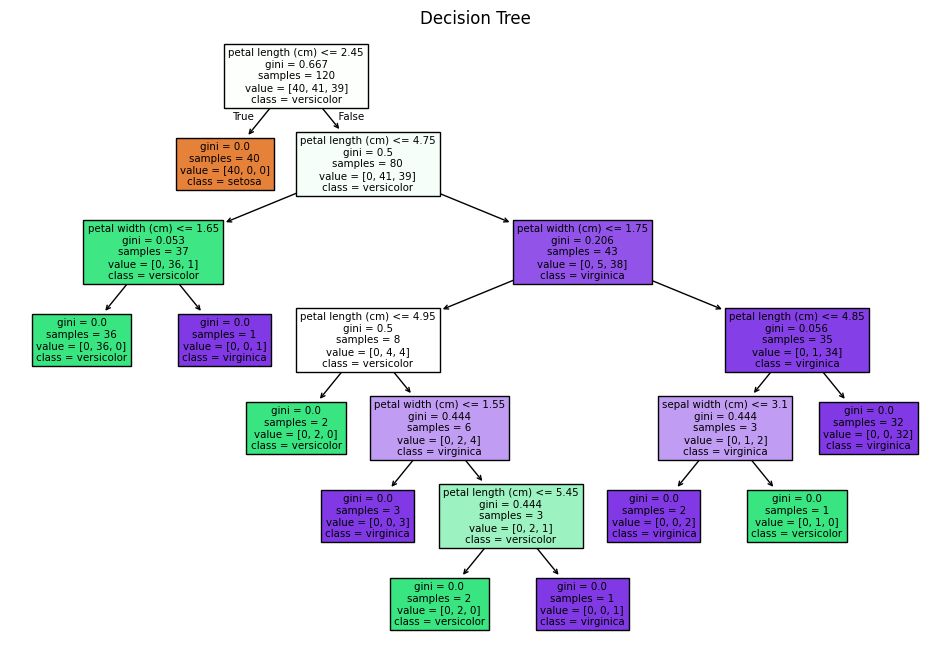

In [16]:
# Plot tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.title("Decision Tree")
plt.show()

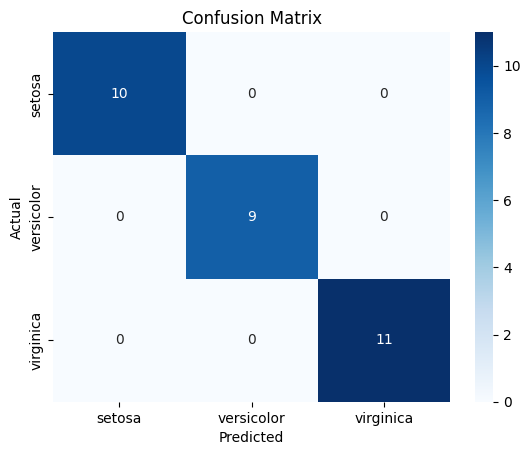

In [17]:

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()